# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

In [1]:
url = 'https://www.kaggle.com/uciml/breast-cancer-wisconsin-data'

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [3]:
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

have the data in the same file as this jupyter notebook. 

In [4]:
df = pd.read_csv('data.csv')

## 4) Show me the head of your data.

In [5]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## 5) Show me the shape of your data

In [6]:
df.shape

(569, 33)

## 6) Show me the proportion of missing observations for each column of your data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

# Can we classify malignant and benign cells using Supervised and Unsupervised Learning and which is better? 

Remove unnecessary columns such as unnamed which has nothing and ID which is not required. 

In [8]:
del df['Unnamed: 32']

In [9]:
del df['id']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

y = diagnosis

In [11]:
y = df['diagnosis'].values

In [12]:
X = df.drop('diagnosis', axis=1)

In [13]:
X.shape

(569, 30)

# Supervised learning via use of Nearest Neighbors, Decision Tree and Random Forest Classifiers. 

## KNN initial attempt

In [14]:

#split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier()

#fit the model
knn.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_test)

#test
knn.score(X_test, y_test)

0.9590643274853801

## Decision Tree 

In [15]:

dtr = DecisionTreeClassifier()

# Fit
dtr.fit(X_train, y_train)

# Predict
y_predicted = dtr.predict(X_test)

# Test
dtr.score(X_test, y_test)

0.9298245614035088

## Random Forest

In [16]:

rf = RandomForestClassifier()

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

rf.score(X_test, y_test)

C:\Users\owenjw\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9532163742690059

# Adding Scaling + Gridsearch 

## KNN Scaling and Gridsearch

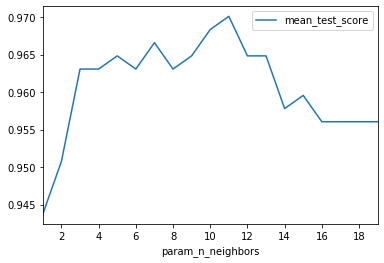

In [17]:

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Create grid search instance 
gskcv = GridSearchCV(knn, {"n_neighbors": range(1, 20)}, cv=kf, n_jobs=-1)
gskcv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gskcv.cv_results_)
# Get plot data
plot_df = cv_df.loc[:, ["param_n_neighbors", "mean_test_score"]]
# Get k values versus mean_test_scores
plot_df.plot.line(x="param_n_neighbors", y="mean_test_score");

In [18]:
gskcv.best_params_

{'n_neighbors': 11}

## Decision Tree scaling and GridSearch

{'max_depth': 21}

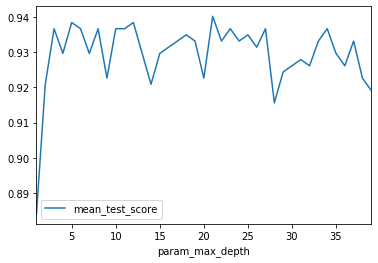

In [19]:

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Create grid search instance 
gsdcv = GridSearchCV(dtr, {"max_depth": range(1, 40)}, cv=kf, n_jobs=-1)
gsdcv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gsdcv.cv_results_)
# Get plot data
plot_df = cv_df.loc[:, ["param_max_depth", "mean_test_score"]]
# Get k values versus mean_test_scores
plot_df.plot.line(x="param_max_depth", y="mean_test_score");
gsdcv.best_params_

Decision Tree gives a different result each time it is run

A second example is shown below.

{'max_depth': 39}

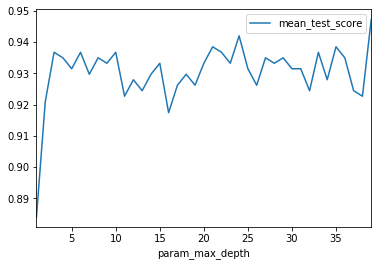

In [20]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Create grid search instance 
gsdcv = GridSearchCV(dtr, {"max_depth": range(1, 40)}, cv=kf, n_jobs=-1)
gsdcv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gsdcv.cv_results_)
# Get plot data
plot_df = cv_df.loc[:, ["param_max_depth", "mean_test_score"]]
# Get k values versus mean_test_scores
plot_df.plot.line(x="param_max_depth", y="mean_test_score");
gsdcv.best_params_





## Random Forest Scaling and GridSearchCV

This is the larger model which can take longer to run, a faster one is below

In [21]:

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create grid search instance 

gscv = GridSearchCV(rf,   {"max_depth": range(10, 20),
     "n_estimators": range(10, 20), 
     "min_samples_leaf": range(1, 4),
     "min_samples_split": range(2, 5)}, cv=kf, n_jobs=-1)

gscv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Create a heatmap-style table
piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)

In [22]:
gscv.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 13}

Faster Random Forest GridsearchCV which can be run more quickly.

C:\Users\owenjw\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


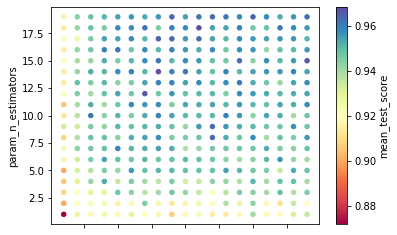

In [23]:

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create grid search instance 
gscv = GridSearchCV(rf,   {"max_depth": range(1, 20),
     "n_estimators": range(1, 20), }, cv=kf, n_jobs=-1)

gscv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Create a heatmap-style table
cv_df['param_max_depth'] = cv_df['param_max_depth'].astype('int')
cv_df['param_n_estimators'] = cv_df['param_n_estimators'].astype('int')
cv_df.plot.scatter(x='param_max_depth', y='param_n_estimators', c='mean_test_score', cmap = 'Spectral');

In [24]:
gscv.best_params_

{'max_depth': 8, 'n_estimators': 14}

As Random Forest uses Decision Tree this too is changing, 

either there are many best paramaters or something is wrong with the model

## learning Curves

In [25]:


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Convert y to binary for learning curves

In [26]:
#convert using pandas get dummies
y_int = pd.get_dummies(y)

# Drop the unnecessary axis
y_int = y_int.drop('B', axis=1)

#show that it is binary
y_int.head()

,M
0,1
1,1
2,1
3,1
4,1


## KNN Learning Curve

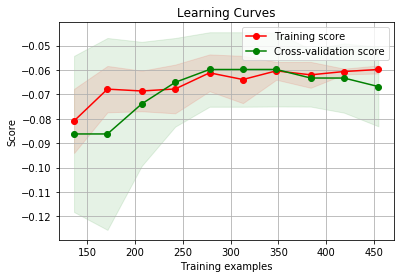

In [27]:
title = "Learning Curves"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
model = KNeighborsClassifier(n_neighbors=11)

plot_learning_curve(model, title, X, y_int, cv=cv_iterator, n_jobs=4)

plt.show()

## Decision Tree Learning Curve

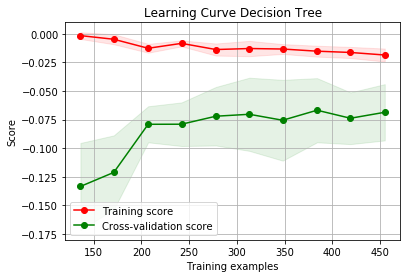

In [28]:
title = "Learning Curve Decision Tree"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
model = DecisionTreeClassifier(max_depth=4)

plot_learning_curve(model, title, X, y_int, cv=cv_iterator, n_jobs=4)

plt.show()

## Random Forest Learning Curve

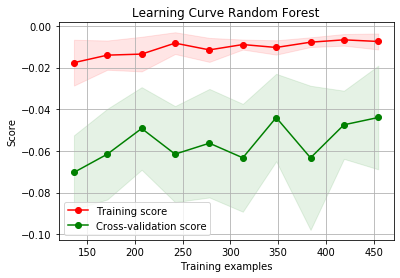

In [29]:
title = "Learning Curve Random Forest"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
model = RandomForestClassifier(n_estimators= 13,max_depth=12, min_samples_split=3, min_samples_leaf=2)

plot_learning_curve(model, title, X, y_int, cv=cv_iterator, n_jobs=4)

plt.show()

# Pipeline and final model

### KNN

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier()),]
pipeline = Pipeline(steps)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#parameters = {'knn__n_neighbors': np.arange(1,20)}
parameters = {'knn__n_neighbors': np.arange(10,20)}
g = GridSearchCV(pipeline, param_grid = parameters, cv=kf, n_jobs=-1)
g.fit(X_train, y_train)
y_pred = g.predict(X_test)
print(g.best_params_)
print(g.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 11}
0.9649122807017544
              precision    recall  f1-score   support

           B       0.97      0.98      0.97       148
           M       0.96      0.94      0.95        80

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



This gives a good reproducible score, but interestingly if we run the pipeline with n_neighbors between 1 and 20 it produces an optimum 
n_neighbors of 3 with a 
lower score.  

## Decision Tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
steps = [('scaler', StandardScaler()), ('dtr', DecisionTreeClassifier())]
pipeline = Pipeline(steps)
parameters = {'dtr__max_depth': np.arange(1,20)}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv = GridSearchCV(pipeline, param_grid = parameters, cv =kf, n_jobs=-1)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'dtr__max_depth': 4}
0.9473684210526315
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Max_depth is changing and the score has become lower as such this model would not be reliable.

## Random forest (quicker version)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier(min_samples_leaf=2, min_samples_split=3))]
pipeline = Pipeline(steps)
parameters = {"rf__max_depth": range(5, 20),
     "rf__n_estimators": range(10, 20), 
     }
cv = GridSearchCV(pipeline, param_grid = parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

C:\Users\owenjw\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'rf__max_depth': 11, 'rf__n_estimators': 14}
0.9649122807017544
              precision    recall  f1-score   support

           B       0.97      0.98      0.97       148
           M       0.96      0.94      0.95        80

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



Random Forest also changes optimum hyperparameters and the value is also changing with each run. 

# Final Decision for Classified Learning

KNN is the best model out of the three as it gives the most consistent results with the highest score.

## 10) Unsupervised Learning
Information about cluster sampling

In [33]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [34]:
#svd = TruncatedSVD()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(kmeans)

In [35]:
newData = df.values
pipeline.fit(X_scaled)

# Calculate the cluster labels: labels
labels = pipeline.predict(X_scaled)
# print(labels)

([<matplotlib.axis.XTick at 0x1a774bb6630>,
 <a list of 14 Text xticklabel objects>)

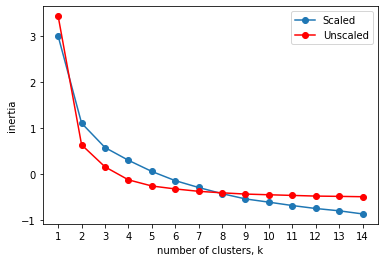

In [36]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

ks = range(1, 15)
inertias = []
inertias2 = []


for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    model.fit(X_scaled)
    inertias.append(model.inertia_)
    model.fit(X)
    inertias2.append(model.inertia_)

# Plot ks vs inertias
ii = preprocessing.scale(inertias)
ii2 = preprocessing.scale(inertias2)
plt.plot(ks, ii, '-o', label = "Scaled")
plt.plot(ks, ii2, '-or', label = "Unscaled")
plt.legend(loc="upper right")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
# plt.yscale('log')

### From the data, we can see that the ideal number of clusters is 2.
The added inertia from 3+ clusters is low.
This correlates with the benign/malignant classification scheme.

In [37]:
model = KMeans(n_clusters = 2)
labels = model.fit_predict(X)

# print(labels)

# Create a DataFrame with labels and varieties as columns: df
df2 = pd.DataFrame({'labels': labels, 'benign': y})

# Create crosstab: ct
ct = pd.crosstab(df2['labels'],df2['benign'])

# Display ct
print(ct)

benign    B    M
labels          
0       356   82
1         1  130


### It appears that the data did not cluster by benign/malignant, however: we should scale the data!

In [38]:
model = KMeans(n_clusters = 2)
labels = model.fit_predict(X_scaled)

# print(labels)

# Create a DataFrame with labels and varieties as columns: df
df2 = pd.DataFrame({'labels': labels, 'benign': y})

# Create crosstab: ct
ct = pd.crosstab(df2['labels'],df2['benign'])

# Display ct
print(ct)

benign    B    M
labels          
0        14  175
1       343   37


In [39]:
type(y_int)

pandas.core.frame.DataFrame

In [40]:
np.unique(y, return_counts=True)

(array(['B', 'M'], dtype=object), array([357, 212], dtype=int64))

### Much better. It appears that even with clustering, the Benign/Malignant dichotomy was found naturally.

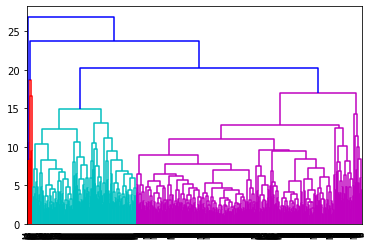

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(X_scaled, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=y,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()


C:\Users\owenjw\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


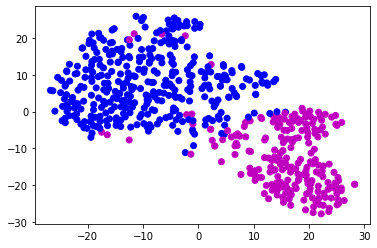

In [42]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y)
plt.show()

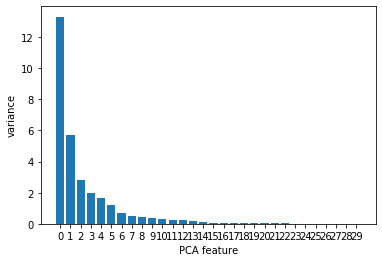

In [43]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### We can see that perhaps the first 5 components are important. Let's reduce!

In [44]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 5 components: pca
pca = PCA(n_components=5)

# Fit the PCA instance to the scaled samples
pca.fit(X_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_scaled)

# Print the shape of pca_features
print(pca_features.shape)

(569, 5)


# Final Considerations

In this project, we have shown two methods of machine learning: supervised and unsupervised learning. We were able to optimize supervised learning algorithms through looking at different algorithms and testing multiple hyperparameters. In the unsupervised learning portion of this project, we were able to "test" whether or not benign/malignant was a natural classification cluster. When 2 clusters are created, it does tend to separate roughly into these two clusters. Overall, we can see if we want to solve a specific problem, supervised learning is the way to go. However, unsupervised learning can show what are considered "natural" clusters within data for classification.

Joshua Owen and Johnathan Zeng contributed equally to the report.